### Flight Price Prediction

#### Life cycle of Machine learning Project:

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing and feature engineering
* Model Training
* Feature selection
* Hyperparameter Tuning
* Best model

##### 1) Problem Statement

This project aims to understand how different features, such as arrival/departure city, number of stops, flight duration, etc, affect the flight price.

##### 2) Data Collection

The data is obtained from Kaggle: https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh?resource=download

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the Excel Data as pandas dataframe

In [3]:
df=pd.read_excel('data/flight_price_pred.xlsx')

View head of dataframe

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826


View shape of dataset

In [5]:
df.shape

(10683, 11)

##### Dataset Information
Understanding the Features

* Airline: Carrier name (e.g., IndiGo, Air India).
* Date_of_Journey: day, Month, Year of date of journey
* Source: origin city
* Destination: arrival city
* Route: The specific path (e.g., Delhi -> Mumbai).
* Dep_Time: The Departure Time
* Arrival_Time: The Arrival Time
* Duration: Total flight time (hours/minutes).
* Total_Stops: Number of layovers (0, 1, 2+).
* Additional_Info: General notes about the flight (e.g., 'No Check-in Baggage', seat class: Economy, Business).
* Target Variable: Price: The actual ticket cost, which the model aims to predict. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Observation that all features except Price are object and would require feature engineering to convert to numeric

##### Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

Check missing values

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Can drop the rows containing a missing value as they are very small percentage of total dataset

In [8]:
df.dropna(inplace=True)

Check again there are no missing value

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Check for duplicated rows

In [10]:
df.duplicated().sum() 

np.int64(220)

Examine duplicated rows

In [11]:
duplicate_rows = df.duplicated(keep=False)
df[duplicate_rows].sort_values(by=list(df.columns))

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
298,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
299,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
5935,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
5937,Air India,03/03/2019,Banglore,New Delhi,BLR → DEL,21:10,23:55,2h 45m,non-stop,No info,7591
3884,Air India,1/04/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,01:20 02 Apr,15h 20m,2 stops,No info,10408
...,...,...,...,...,...,...,...,...,...,...,...
9236,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
9706,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
9726,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
7939,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403


Appear to be inconsistent value formats in some columns (such as Arrival_Time sometimes has a date sometimes not), so decide to perform feature engineering on these columns first before checking for duplicates again

Examine the duration column, Date of Journey, dep_time and arrival_time columns

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826


convert Duration column to timedelta to accurately reflect time

In [13]:
df['duration_timedelta'] = pd.to_timedelta(df['Duration'])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_timedelta
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,0 days 05:40:00
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,0 days 06:40:00
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,0 days 04:40:00
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,0 days 06:05:00
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,0 days 06:15:00


Sort by duration Time delta to observe

In [14]:
df_sorted = df.sort_values(by='duration_timedelta', ascending=False)
df_sorted.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_timedelta
143,Jet Airways,6/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 08 Mar,47h 40m,2 stops,No info,20694,1 days 23:40:00
146,Jet Airways,3/03/2019,Delhi,Cochin,DEL → IDR → BOM → COK,05:25,04:25 05 Mar,47h,2 stops,No info,20064,1 days 23:00:00
2374,Jet Airways,21/03/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,04:25 23 Mar,42h 45m,2 stops,No info,12819,1 days 18:45:00
3037,Jet Airways,21/03/2019,Delhi,Cochin,DEL → IDR → BOM → COK,10:20,04:25 23 Mar,42h 5m,2 stops,No info,11664,1 days 18:05:00
1480,Air India,24/03/2019,Kolkata,Banglore,CCU → GAU → DEL → BLR,05:55,23:15 25 Mar,41h 20m,2 stops,No info,13990,1 days 17:20:00


Combine Date of Journey and Dep Time to get one value for the time and date of departure

In [15]:
df['Dept full time'] = df['Date_of_Journey'] + ' ' + df['Dep_Time']
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_timedelta,Dept full time
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,0 days 05:40:00,01/03/2019 05:45
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,0 days 06:40:00,01/03/2019 05:45
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,0 days 04:40:00,01/03/2019 09:45
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,0 days 06:05:00,18/03/2019 18:40
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,0 days 06:15:00,18/03/2019 22:50


Convert Dept full time column to datetime

In [16]:
df['timestamp_dept_time'] = pd.to_datetime(df['Dept full time'], format="%d/%m/%Y %H:%M")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_timedelta,Dept full time,timestamp_dept_time
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,0 days 05:40:00,01/03/2019 05:45,2019-03-01 05:45:00
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,0 days 06:40:00,01/03/2019 05:45,2019-03-01 05:45:00
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,0 days 04:40:00,01/03/2019 09:45,2019-03-01 09:45:00
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,0 days 06:05:00,18/03/2019 18:40,2019-03-18 18:40:00
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,0 days 06:15:00,18/03/2019 22:50,2019-03-18 22:50:00


Create the new arrival time column by adding the departure timedelta column to the duration timedelta and compare if it matches the original arrival time column

In [17]:
df['timestamp_arrival_time'] = df['timestamp_dept_time'] + df['duration_timedelta']

In [18]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,duration_timedelta,Dept full time,timestamp_dept_time,timestamp_arrival_time
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,0 days 05:40:00,01/03/2019 05:45,2019-03-01 05:45:00,2019-03-01 11:25:00
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,0 days 06:40:00,01/03/2019 05:45,2019-03-01 05:45:00,2019-03-01 12:25:00
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,0 days 04:40:00,01/03/2019 09:45,2019-03-01 09:45:00,2019-03-01 14:25:00
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,0 days 06:05:00,18/03/2019 18:40,2019-03-18 18:40:00,2019-03-19 00:45:00
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,0 days 06:15:00,18/03/2019 22:50,2019-03-18 22:50:00,2019-03-19 05:05:00
5,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826,0 days 06:05:00,01/03/2019 16:55,2019-03-01 16:55:00,2019-03-01 23:00:00
6,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285,0 days 08:20:00,6/03/2019 20:05,2019-03-06 20:05:00,2019-03-07 04:25:00
7,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229,0 days 05:00:00,01/03/2019 05:45,2019-03-01 05:45:00,2019-03-01 10:45:00
8,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490,0 days 08:20:00,3/03/2019 20:05,2019-03-03 20:05:00,2019-03-04 04:25:00
9,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983,0 days 06:25:00,1/03/2019 12:50,2019-03-01 12:50:00,2019-03-01 19:15:00


Observation: Most of the timedelta arrival time line up with the original arrival time column, however notice some discrepencies that are data entry errors. I will assume the duration is accurate and keep the new arrival time column. 

drop the original columns I no longer need

In [19]:
df.drop(columns=['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Dept full time'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,duration_timedelta,timestamp_dept_time,timestamp_arrival_time
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,5h 40m,1 stop,Business class,79512,0 days 05:40:00,2019-03-01 05:45:00,2019-03-01 11:25:00
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,6h 40m,1 stop,Business class,62427,0 days 06:40:00,2019-03-01 05:45:00,2019-03-01 12:25:00
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,4h 40m,1 stop,Business class,57209,0 days 04:40:00,2019-03-01 09:45:00,2019-03-01 14:25:00
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 5m,1 stop,No info,54826,0 days 06:05:00,2019-03-18 18:40:00,2019-03-19 00:45:00
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 15m,1 stop,No info,54826,0 days 06:15:00,2019-03-18 22:50:00,2019-03-19 05:05:00


Check the column types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Airline                 10682 non-null  object         
 1   Source                  10682 non-null  object         
 2   Destination             10682 non-null  object         
 3   Route                   10682 non-null  object         
 4   Duration                10682 non-null  object         
 5   Total_Stops             10682 non-null  object         
 6   Additional_Info         10682 non-null  object         
 7   Price                   10682 non-null  int64          
 8   duration_timedelta      10682 non-null  timedelta64[ns]
 9   timestamp_dept_time     10682 non-null  datetime64[ns] 
 10  timestamp_arrival_time  10682 non-null  datetime64[ns] 
dtypes: datetime64[ns](2), int64(1), object(7), timedelta64[ns](1)
memory usage: 1001.4+ KB


Check the duplicates again

In [21]:
df.duplicated().sum() 

np.int64(222)

Examine duplicated rows

In [22]:
duplicate_rows = df.duplicated(keep=False)
df[duplicate_rows].sort_values(by=list(df.columns))

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,duration_timedelta,timestamp_dept_time,timestamp_arrival_time
9015,Air Asia,Banglore,New Delhi,BLR → DEL,2h 45m,non-stop,No info,4482,0 days 02:45:00,2019-03-24 23:25:00,2019-03-25 02:10:00
9017,Air Asia,Banglore,New Delhi,BLR → DEL,2h 45m,non-stop,No info,4482,0 days 02:45:00,2019-03-24 23:25:00,2019-03-25 02:10:00
298,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,39h 5m,2 stops,No info,17135,1 days 15:05:00,2019-03-01 08:50:00,2019-03-02 23:55:00
299,Air India,Banglore,New Delhi,BLR → BOM → AMD → DEL,39h 5m,2 stops,No info,17135,1 days 15:05:00,2019-03-01 08:50:00,2019-03-02 23:55:00
2388,Air India,Banglore,New Delhi,BLR → BOM → NAG → DEL,25h 25m,2 stops,No info,12778,1 days 01:25:00,2019-03-12 08:50:00,2019-03-13 10:15:00
...,...,...,...,...,...,...,...,...,...,...,...
6689,SpiceJet,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,6860,0 days 02:50:00,2019-03-03 20:30:00,2019-03-03 23:20:00
7939,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,5403,0 days 02:40:00,2019-03-24 11:30:00,2019-03-24 14:10:00
7946,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,5403,0 days 02:40:00,2019-03-24 11:30:00,2019-03-24 14:10:00
5929,Vistara,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,7608,0 days 02:55:00,2019-03-03 21:10:00,2019-03-04 00:05:00


Now it is clear that these rows are exact duplicates and a small percentage of the overall dataset, so keep first occurence

In [23]:
df = df.drop_duplicates() 

Check again there are no duplicates

In [24]:
df.duplicated().sum() 

np.int64(0)

Check the number of unique values in each column

In [25]:
df.nunique()

Airline                     12
Source                       5
Destination                  6
Route                      128
Duration                   368
Total_Stops                  5
Additional_Info             10
Price                     1870
duration_timedelta         368
timestamp_dept_time       4158
timestamp_arrival_time    4273
dtype: int64

In [26]:
df.describe()

,Price,duration_timedelta,timestamp_dept_time,timestamp_arrival_time
count,10460.000000,10460,10460,10460
mean,9027.360421,0 days 10:29:52.170172084,2019-05-05 02:45:53.632887296,2019-05-05 13:15:45.803059456
min,1759.000000,0 days 00:05:00,2019-03-01 00:20:00,2019-03-01 04:00:00
25%,5224.000000,0 days 02:50:00,2019-03-27 17:33:45,2019-03-28 04:25:00
50%,8266.000000,0 days 08:25:00,2019-05-15 08:25:00,2019-05-15 19:00:00
75%,12346.250000,0 days 15:10:00,2019-06-06 05:56:15,2019-06-06 11:50:00
max,79512.000000,1 days 23:40:00,2019-06-27 23:55:00,2019-06-29 04:25:00
std,4625.057376,0 days 08:20:42.392250434,NaN,NaN


Observations:
* The mean of price is around 9000, but has a max of nearly 80000, which indicates some outliers
* The mean duration is around 0 days and 10 hours
* All the departure times fall from march 2019 to june 2019.
* All the arrival times fall from the beginning of march 2019 to end of june 2019, which indicates 2019 Quarter 2 flight data. 

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,duration_timedelta,timestamp_dept_time,timestamp_arrival_time
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,5h 40m,1 stop,Business class,79512,0 days 05:40:00,2019-03-01 05:45:00,2019-03-01 11:25:00
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,6h 40m,1 stop,Business class,62427,0 days 06:40:00,2019-03-01 05:45:00,2019-03-01 12:25:00
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,4h 40m,1 stop,Business class,57209,0 days 04:40:00,2019-03-01 09:45:00,2019-03-01 14:25:00
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 5m,1 stop,No info,54826,0 days 06:05:00,2019-03-18 18:40:00,2019-03-19 00:45:00
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 15m,1 stop,No info,54826,0 days 06:15:00,2019-03-18 22:50:00,2019-03-19 05:05:00


Split out dept and arrival time into day, month, hour and minute
Split out duration column into hours and minutes

In [28]:
df['dept_day'] = df['timestamp_dept_time'].dt.day
df['dept_month'] = df['timestamp_dept_time'].dt.month
df['dept_hour'] = df['timestamp_dept_time'].dt.hour
df['dept_minute'] = df['timestamp_dept_time'].dt.minute

df['arrival_day'] = df['timestamp_arrival_time'].dt.day
df['arrival_month'] = df['timestamp_arrival_time'].dt.month
df['arrival_hour'] = df['timestamp_arrival_time'].dt.hour
df['arrival_minute'] = df['timestamp_arrival_time'].dt.minute

df['duration_hours'] = df['duration_timedelta'].dt.components.hours
df['duration_minutes'] = df['duration_timedelta'].dt.components.minutes

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,duration_timedelta,timestamp_dept_time,...,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,5h 40m,1 stop,Business class,79512,0 days 05:40:00,2019-03-01 05:45:00,...,1,3,5,45,1,3,11,25,5,40
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,6h 40m,1 stop,Business class,62427,0 days 06:40:00,2019-03-01 05:45:00,...,1,3,5,45,1,3,12,25,6,40
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,4h 40m,1 stop,Business class,57209,0 days 04:40:00,2019-03-01 09:45:00,...,1,3,9,45,1,3,14,25,4,40
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 5m,1 stop,No info,54826,0 days 06:05:00,2019-03-18 18:40:00,...,18,3,18,40,19,3,0,45,6,5
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 15m,1 stop,No info,54826,0 days 06:15:00,2019-03-18 22:50:00,...,18,3,22,50,19,3,5,5,6,15


Plot boxplot of departure month against price to see if any correlation

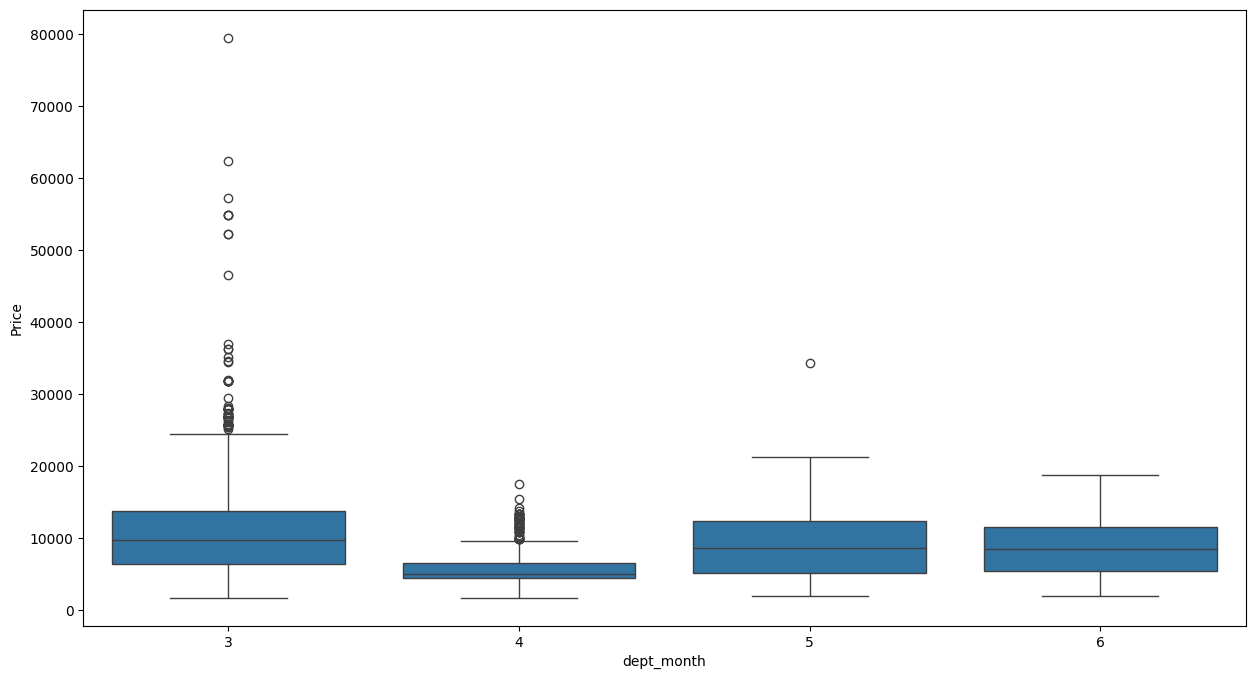

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(x='dept_month',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

Observation that flights departing in March have more outliers that are more expensive then flights in may or june

Plot boxplot of departure hour vs price to see if any correlation

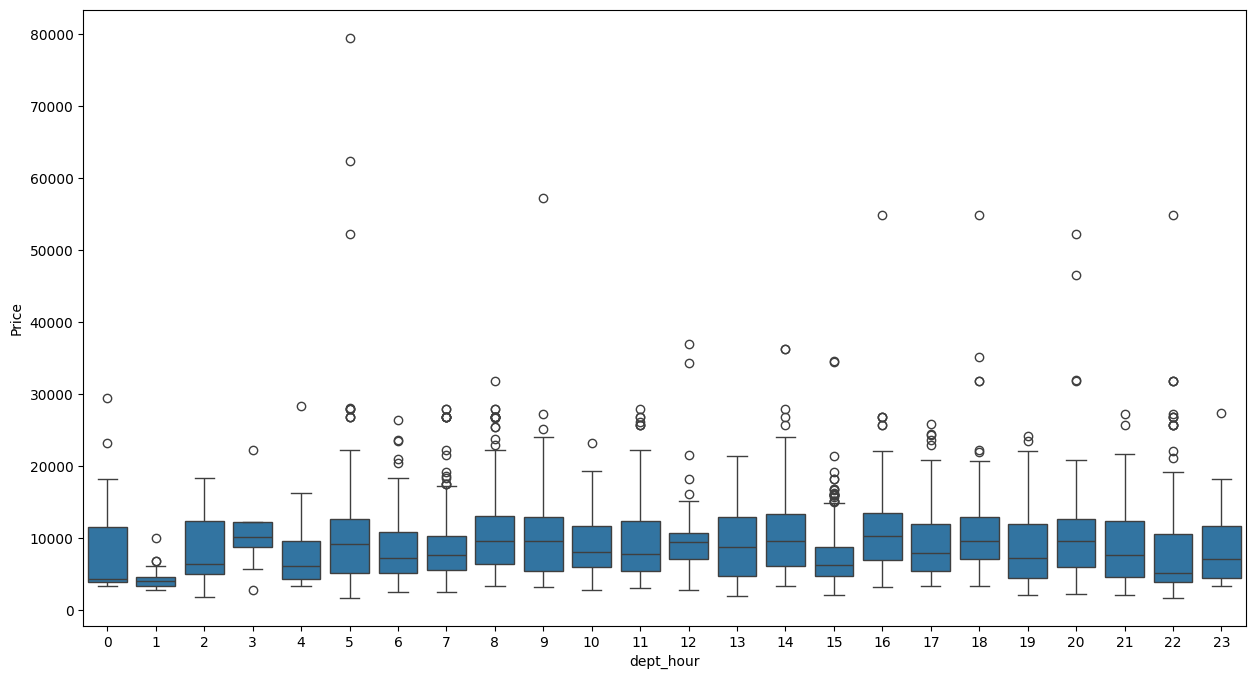

In [30]:
plt.figure(figsize=(15,8))
sns.boxplot(x='dept_hour',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

No large differences but flights departing around 16-22 hours (4 to 10 PM) tend to have some higher prices. Late at night and early morning flights (12AM - 5AM) tend to have lower prices

Plot boxplot of flight duration vs Price to see if any trend

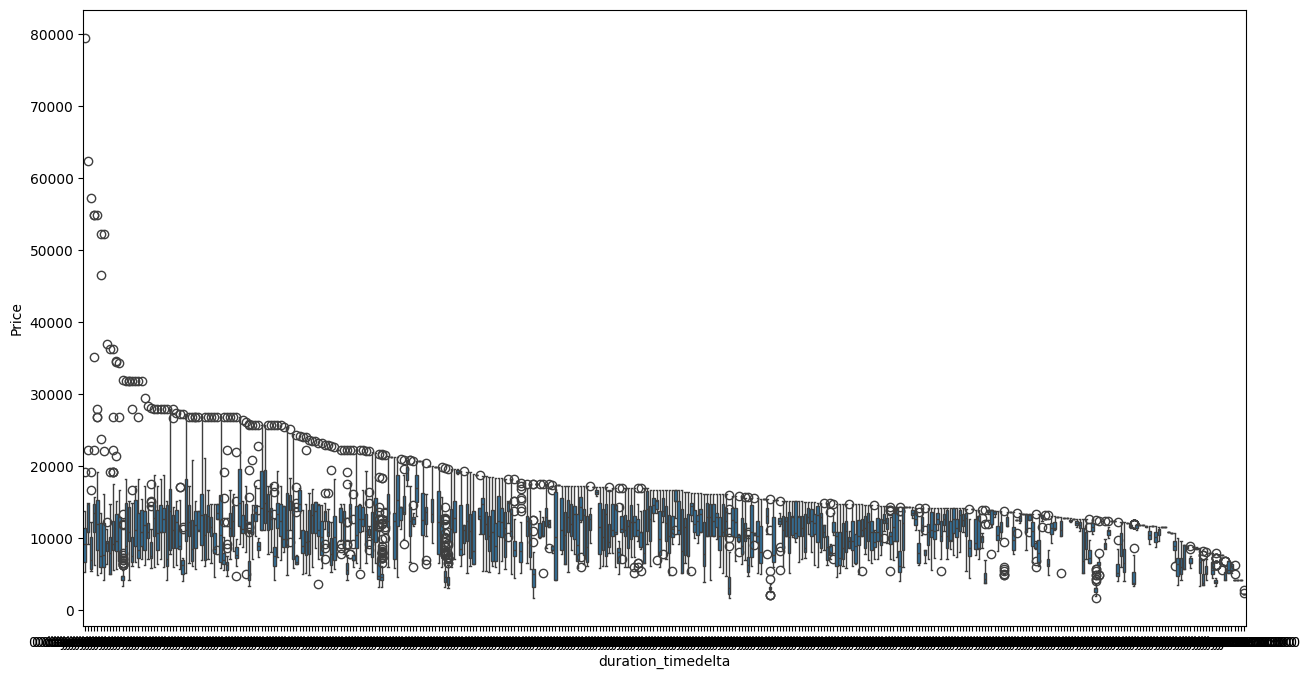

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(x='duration_timedelta',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

The longer the flight duration, the price follows a downward trend. This makes sense, since the longer the flight, the less expensive it is

Drop the columns I no longer need. Duration is represented by departure and arrival time so can be dropped. 

In [32]:
df.drop(columns=['Duration', 'timestamp_dept_time', 'timestamp_arrival_time', 'duration_timedelta'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,5,45,1,3,11,25,5,40
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,5,45,1,3,12,25,6,40
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,9,45,1,3,14,25,4,40
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,18,40,19,3,0,45,6,5
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,22,50,19,3,5,5,6,15


Check datatypes

In [33]:
df.dtypes 

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
dept_day             int32
dept_month           int32
dept_hour            int32
dept_minute          int32
arrival_day          int32
arrival_month        int32
arrival_hour         int32
arrival_minute       int32
duration_hours       int64
duration_minutes     int64
dtype: object

Find the categorical features

In [34]:
categorical_features=[column for column in df.columns if df[column].dtype=='object']
categorical_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Find the numerical features

In [35]:
numerical_features=[column for column in df.columns if df[column].dtype!='object']
numerical_features

['Price',
 'dept_day',
 'dept_month',
 'dept_hour',
 'dept_minute',
 'arrival_day',
 'arrival_month',
 'arrival_hour',
 'arrival_minute',
 'duration_hours',
 'duration_minutes']

'Airline', 'Source', 'Destination' features are nominal (don't have an inherent order) - check each feature's relevance on the dependent var, price.

First get count of each value in Airline

In [36]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

Plot boxplot of Airline vs Price

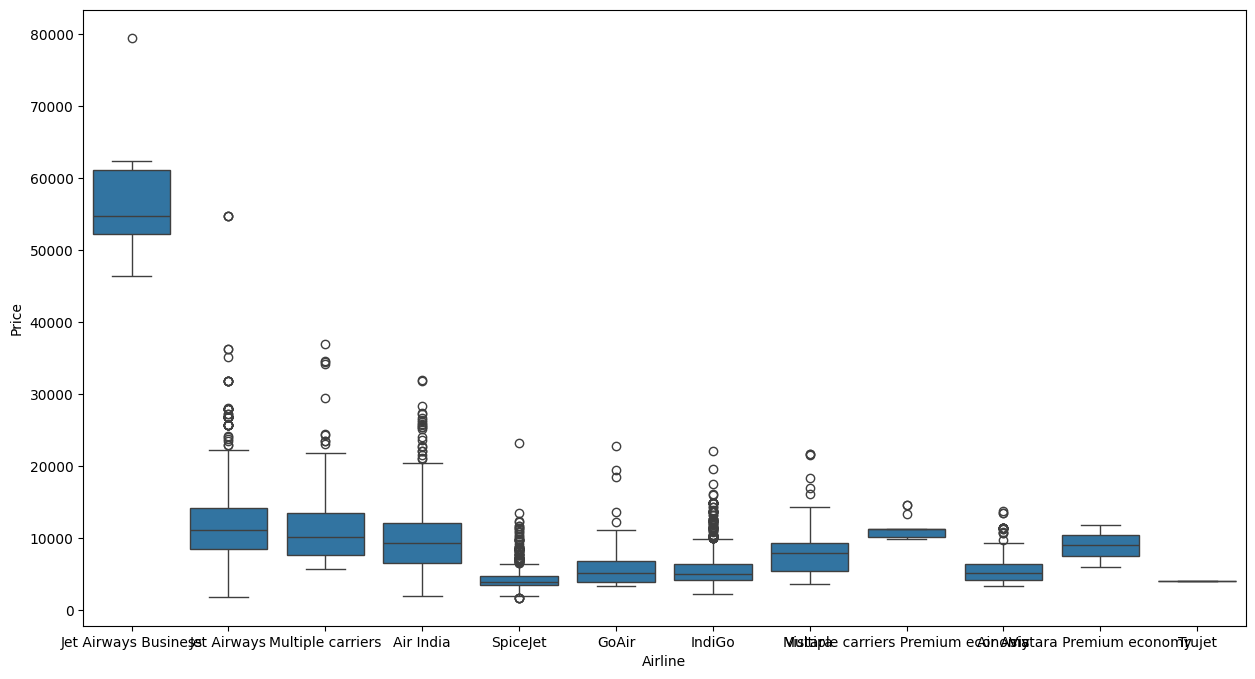

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

Observation that JetAirways has vastly higher prices then the rest of the airlines

Repeat for the source cities

In [38]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2177
Mumbai       697
Chennai      381
Name: count, dtype: int64

Notice that 'Source' and 'Destination' have overlapping values, so rename each to be clear

In [39]:
df['Source'] = "S_" + df['Source']

In [40]:
df['Source'].value_counts()

Source
S_Delhi       4345
S_Kolkata     2860
S_Banglore    2177
S_Mumbai       697
S_Chennai      381
Name: count, dtype: int64

<Figure size 1500x3000 with 0 Axes>

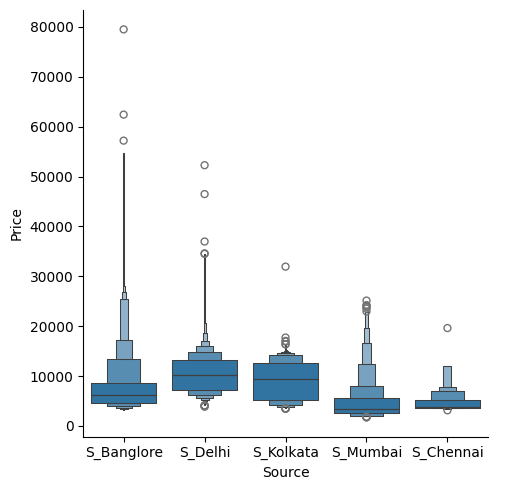

In [41]:
plt.figure(figsize=(15,30))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
plt.show()

Observation that Banglore has highest price outliers, followed by Delhi.

In [42]:
df['Destination'] = "D_" + df['Destination']

Repeat analysis for Destination

In [43]:
df['Destination'].value_counts()

Destination
D_Cochin       4345
D_Banglore     2860
D_Delhi        1265
D_New Delhi     912
D_Hyderabad     697
D_Kolkata       381
Name: count, dtype: int64

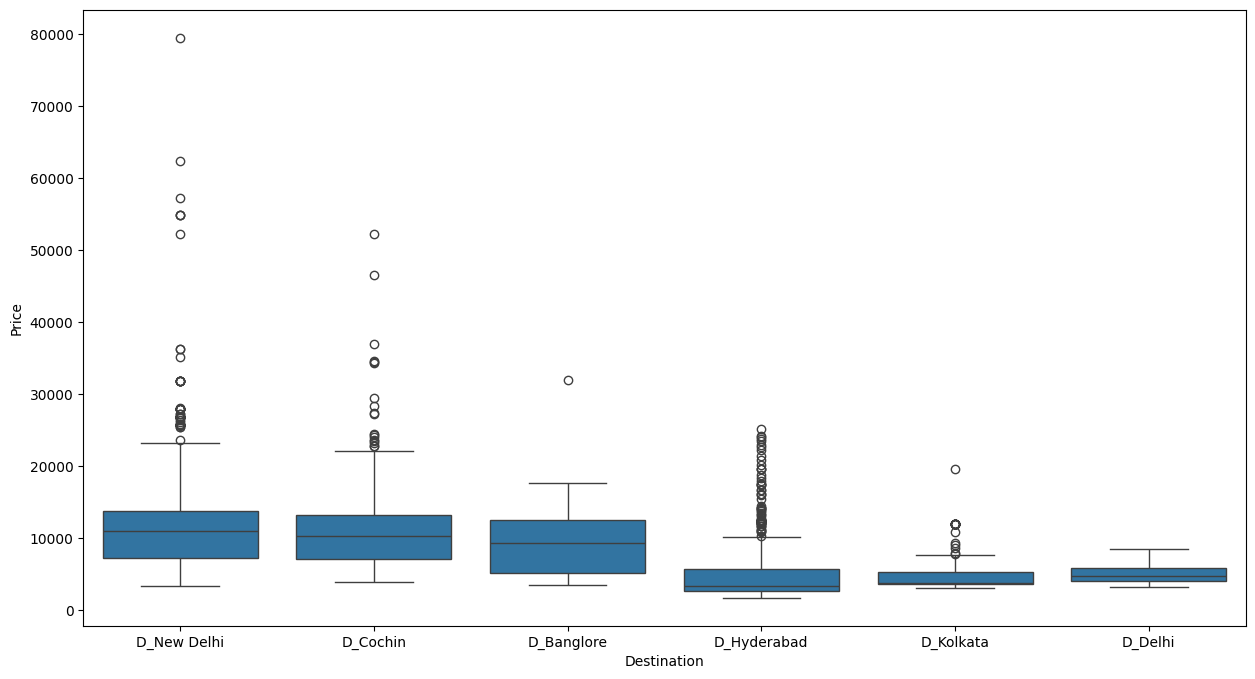

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))
plt.show()

Observation that New Delhi has greatest price outlier followed by Cochin

Perform one hot encoding for Airline, Source and Destination

In [45]:
Airline=pd.get_dummies(df['Airline'],drop_first=True, dtype=int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [46]:
Source=pd.get_dummies(df['Source'],drop_first=True, dtype=int)
Source.head()

,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [47]:
Destination=pd.get_dummies(df['Destination'],drop_first=True, dtype=int)
Destination.head()

,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New Delhi
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


Examine the route column

In [48]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1534
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → IXA → BLR             1
BOM → GOI → HYD             1
CCU → VTZ → BLR             1
CCU → RPR → HYD → BLR       1
BOM → NDC → HYD             1
Name: count, Length: 128, dtype: int64

Examine the Total Stops feature

In [49]:
df['Total_Stops'].unique()

array(['1 stop', '2 stops', 'non-stop', '3 stops', '4 stops'],
      dtype=object)

In [50]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3473
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

There is one route with 4 stops. Drop this one route. 

In [51]:
df[df['Total_Stops'] == '4 stops']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes
242,Air India,S_Banglore,D_New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,4 stops,Change airports,17686,1,3,5,50,2,3,11,20,5,30


In [52]:
df = df[df['Total_Stops'] != '4 stops']

Check this route dropped

In [53]:
df[df['Total_Stops'] == '4 stops']

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes


Split each route into seperate column

In [54]:
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]

df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,Jet Airways Business,S_Banglore,D_New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,5,...,3,11,25,5,40,BLR,BOM,DEL,NaN,NaN
1,Jet Airways Business,S_Banglore,D_New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,5,...,3,12,25,6,40,BLR,BOM,DEL,NaN,NaN
2,Jet Airways Business,S_Banglore,D_New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,9,...,3,14,25,4,40,BLR,MAA,DEL,NaN,NaN
3,Jet Airways,S_Banglore,D_New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,18,...,3,0,45,6,5,BLR,BOM,DEL,NaN,NaN
4,Jet Airways,S_Banglore,D_New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,22,...,3,5,5,6,15,BLR,BOM,DEL,NaN,NaN


Drop the unneeded route column

In [55]:
df.drop(columns=['Route'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,...,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,Jet Airways Business,S_Banglore,D_New Delhi,1 stop,Business class,79512,1,3,5,45,...,3,11,25,5,40,BLR,BOM,DEL,NaN,NaN
1,Jet Airways Business,S_Banglore,D_New Delhi,1 stop,Business class,62427,1,3,5,45,...,3,12,25,6,40,BLR,BOM,DEL,NaN,NaN
2,Jet Airways Business,S_Banglore,D_New Delhi,1 stop,Business class,57209,1,3,9,45,...,3,14,25,4,40,BLR,MAA,DEL,NaN,NaN
3,Jet Airways,S_Banglore,D_New Delhi,1 stop,No info,54826,18,3,18,40,...,3,0,45,6,5,BLR,BOM,DEL,NaN,NaN
4,Jet Airways,S_Banglore,D_New Delhi,1 stop,No info,54826,18,3,22,50,...,3,5,5,6,15,BLR,BOM,DEL,NaN,NaN


Check NA for the route columns

In [56]:
df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                   0
dept_day                0
dept_month              0
dept_hour               0
dept_minute             0
arrival_day             0
arrival_month           0
arrival_hour            0
arrival_minute          0
duration_hours          0
duration_minutes        0
Route1                  0
Route2                  0
Route3               3473
Route4               9098
Route5              10416
dtype: int64

fill the Routes with NA with None

In [57]:
for i in ['Route3', 'Route4', 'Route5']:
    df[i].fillna('None',inplace=True)

In [58]:
df.isnull().sum() 

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
dept_day            0
dept_month          0
dept_hour           0
dept_minute         0
arrival_day         0
arrival_month       0
arrival_hour        0
arrival_minute      0
duration_hours      0
duration_minutes    0
Route1              0
Route2              0
Route3              0
Route4              0
Route5              0
dtype: int64

Check the value counts of each Route

In [59]:
df['Route1'].nunique()

5

In [61]:
df['Route2'].nunique()

45

In [62]:
df['Route3'].nunique()

30

In [63]:
df['Route4'].nunique()

14

In [64]:
df['Route5'].nunique()

5

Check the Total Stops and Route columns are accurate. For example, if Route5 is populated, that means every flight must have 3 stops. (Route1 is Source, Route5 is Dest, and 3 stops in between).

In [70]:

df[df['Route5'] != 'None']['Total_Stops'].value_counts()

Total_Stops
3 stops    43
Name: count, dtype: int64

For all flights with 3 stops, check that source and destination cities match up with Route 1 and Route 5 respectively

In [72]:
df[df['Route5'] != 'None']['Source'].value_counts()

Source
S_Delhi       23
S_Kolkata     11
S_Banglore     7
S_Mumbai       2
Name: count, dtype: int64

In [73]:
df[df['Route5'] != 'None']['Route1'].value_counts()

Route1
DEL     23
CCU     11
BLR      7
BOM      2
Name: count, dtype: int64

In [74]:
df[df['Route5'] != 'None']['Destination'].value_counts()

Destination
D_Cochin       23
D_Banglore     11
D_New Delhi     7
D_Hyderabad     2
Name: count, dtype: int64

In [75]:
df[df['Route5'] != 'None']['Route5'].value_counts()

Route5
COK    23
BLR    11
DEL     7
HYD     2
Name: count, dtype: int64

Since the cities in each of the Routes (legs) of the flight are not ordinal, and contain too many for one hot encoding, decide to do target encoding for each of the Route columns, which will be done later after the data is split into train and test

Examine total_stop column

In [76]:
df['Total_Stops'].unique()

array(['1 stop', '2 stops', 'non-stop', '3 stops'], dtype=object)

Since the Total_Stops is ordinal data, encode as number

In [282]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3})
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,Jet Airways Business,S_Banglore,D_New Delhi,1,Business class,79512,1,3,5,45,1,3,11,25,5,40,BLR,BOM,DEL,None,None
1,Jet Airways Business,S_Banglore,D_New Delhi,1,Business class,62427,1,3,5,45,1,3,12,25,6,40,BLR,BOM,DEL,None,None
2,Jet Airways Business,S_Banglore,D_New Delhi,1,Business class,57209,1,3,9,45,1,3,14,25,4,40,BLR,MAA,DEL,None,None
3,Jet Airways,S_Banglore,D_New Delhi,1,No info,54826,18,3,18,40,19,3,0,45,6,5,BLR,BOM,DEL,None,None
4,Jet Airways,S_Banglore,D_New Delhi,1,No info,54826,18,3,22,50,19,3,5,5,6,15,BLR,BOM,DEL,None,None


Visualize the mean of the price for each category of Total_stops

In [283]:
price_by_stops = df.groupby('Total_Stops')['Price'].mean().reset_index()
price_by_stops

,Total_Stops,Price
0,0,5017.915635
1,1,10594.123556
2,2,12761.099393
3,3,13260.674419


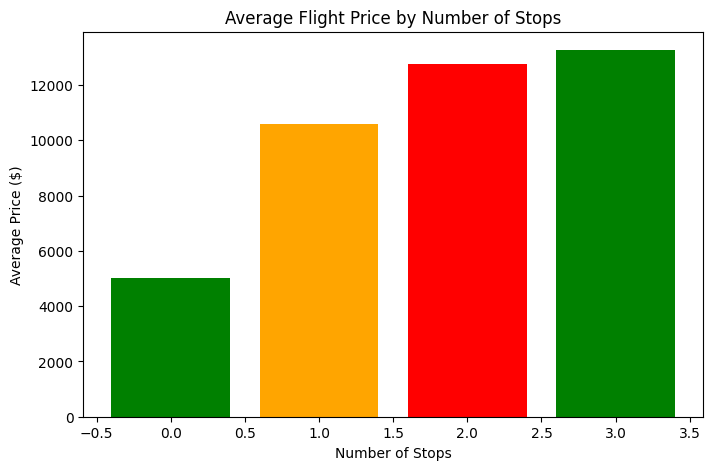

In [284]:
plt.figure(figsize=(8, 5))
plt.bar(price_by_stops['Total_Stops'], price_by_stops['Price'], color=['green', 'orange', 'red'])
plt.title('Average Flight Price by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price ($)')
plt.show()

Observation is very interesting that as number of stops increase, the price increase, usually one would expect the opposite. 
However, this could be due to the fact of discounting flights, less popular route, competition and other reasons

In [285]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3473
2    1318
3      43
Name: count, dtype: int64

Examine add_info column

In [286]:
df['Additional_Info'].unique()

array(['Business class', 'No info', '1 Long layover', '1 Short layover',
       '2 Long layover', 'Change airports', 'In-flight meal not included',
       'Red-eye flight', 'No Info', 'No check-in baggage included'],
      dtype=object)

In [287]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8180
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    6
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: count, dtype: int64

<Figure size 5000x1500 with 0 Axes>

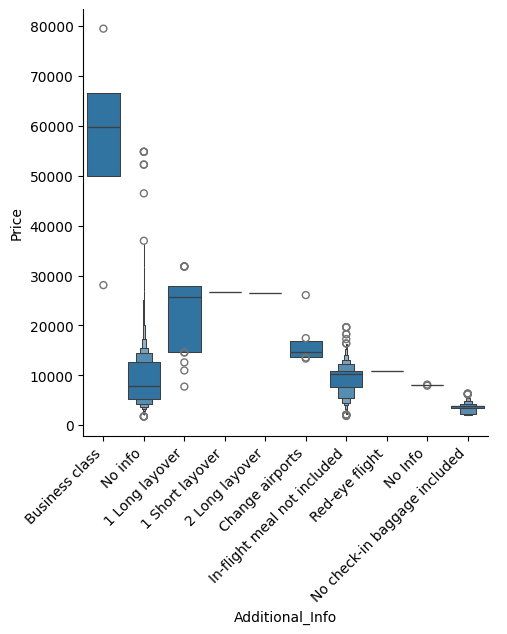

In [288]:
plt.figure(figsize=(50,15))

g = sns.catplot(x='Additional_Info',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
g.set_xticklabels(rotation=45, ha="right")
plt.show()

Observation: Business class strongly indicate higher price, however only 4 entries total. Other information has little entry or not representative of dataset, so decide to remove the Additional_Info feature. 

Drop Additional_info, and the one-hot encoded original cols

In [289]:
df.drop(columns=['Airline', 'Source', 'Destination', 'Additional_Info'], axis=1, inplace=True)
df.head()

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5
0,1,79512,1,3,5,45,1,3,11,25,5,40,BLR,BOM,DEL,None,None
1,1,62427,1,3,5,45,1,3,12,25,6,40,BLR,BOM,DEL,None,None
2,1,57209,1,3,9,45,1,3,14,25,4,40,BLR,MAA,DEL,None,None
3,1,54826,18,3,18,40,19,3,0,45,6,5,BLR,BOM,DEL,None,None
4,1,54826,18,3,22,50,19,3,5,5,6,15,BLR,BOM,DEL,None,None


Concat the one-hot encoding for Airline, Source and Destination

In [290]:
df=pd.concat([df,Airline,Source,Destination],axis=1)
df.head()

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New Delhi
0,1.0,79512.0,1.0,3.0,5.0,45.0,1.0,3.0,11.0,25.0,5.0,40.0,BLR,BOM,DEL,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,62427.0,1.0,3.0,5.0,45.0,1.0,3.0,12.0,25.0,6.0,40.0,BLR,BOM,DEL,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,57209.0,1.0,3.0,9.0,45.0,1.0,3.0,14.0,25.0,4.0,40.0,BLR,MAA,DEL,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,54826.0,18.0,3.0,18.0,40.0,19.0,3.0,0.0,45.0,6.0,5.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.0,54826.0,18.0,3.0,22.0,50.0,19.0,3.0,5.0,5.0,6.0,15.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Check Price for outliers

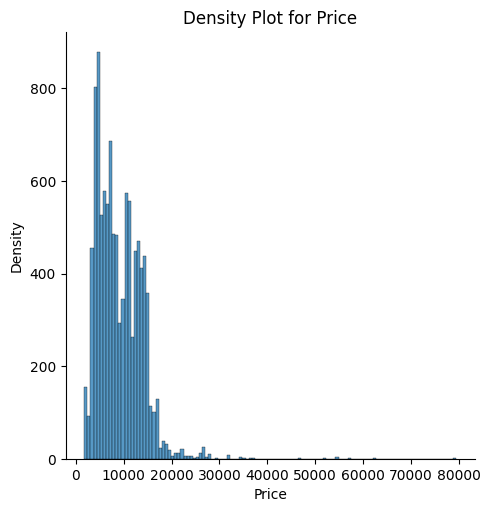

In [ ]:
sns.displot(df['Price'])

plt.title('Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

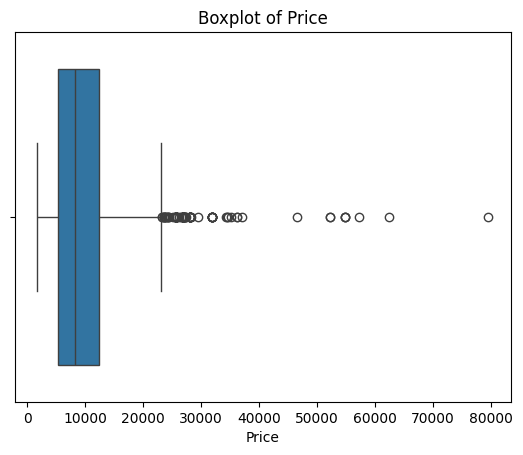

In [292]:
sns.boxplot(x=df["Price"])
plt.title("Boxplot of Price")
plt.show()

Sort by highest price to examine outliers

In [293]:
high_price = df.sort_values(by='Price', ascending=False)
high_price.head(15)

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New Delhi
0,1.0,79512.0,1.0,3.0,5.0,45.0,1.0,3.0,11.0,25.0,5.0,40.0,BLR,BOM,DEL,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.0,62427.0,1.0,3.0,5.0,45.0,1.0,3.0,12.0,25.0,6.0,40.0,BLR,BOM,DEL,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,57209.0,1.0,3.0,9.0,45.0,1.0,3.0,14.0,25.0,4.0,40.0,BLR,MAA,DEL,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1.0,54826.0,1.0,3.0,16.0,55.0,1.0,3.0,23.0,0.0,6.0,5.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,54826.0,18.0,3.0,18.0,40.0,19.0,3.0,0.0,45.0,6.0,5.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.0,54826.0,18.0,3.0,22.0,50.0,19.0,3.0,5.0,5.0,6.0,15.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2.0,52285.0,6.0,3.0,20.0,5.0,7.0,3.0,4.0,25.0,8.0,20.0,DEL,ATQ,BOM,COK,None,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
7,1.0,52229.0,1.0,3.0,5.0,45.0,1.0,3.0,10.0,45.0,5.0,0.0,BLR,BOM,DEL,None,None,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,2.0,46490.0,3.0,3.0,20.0,5.0,4.0,3.0,4.0,25.0,8.0,20.0,DEL,ATQ,BOM,COK,None,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9,1.0,36983.0,1.0,3.0,12.0,50.0,1.0,3.0,19.0,15.0,6.0,25.0,DEL,BOM,COK,None,None,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


Only a few outliers and Substantial change in price until around 40000, so drop those above

In [294]:
df = df[df['Price'] <= 40000]

In [295]:
high_price = df.sort_values(by='Price', ascending=False)
high_price.head(15)

,Total_Stops,Price,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New Delhi
9,1.0,36983.0,1.0,3.0,12.0,50.0,1.0,3.0,19.0,15.0,6.0,25.0,DEL,BOM,COK,None,None,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10,1.0,36235.0,1.0,3.0,14.0,5.0,1.0,3.0,19.0,10.0,5.0,5.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11,1.0,36235.0,1.0,3.0,14.0,5.0,1.0,3.0,21.0,20.0,7.0,15.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12,1.0,35185.0,1.0,3.0,18.0,40.0,2.0,3.0,0.0,45.0,6.0,5.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
13,2.0,34608.0,9.0,3.0,15.0,5.0,10.0,3.0,1.0,35.0,10.0,30.0,DEL,IDR,BOM,COK,None,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
14,2.0,34503.0,3.0,3.0,15.0,5.0,4.0,3.0,1.0,35.0,10.0,30.0,DEL,IDR,BOM,COK,None,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
15,1.0,34273.0,9.0,5.0,12.0,50.0,10.0,5.0,1.0,30.0,12.0,40.0,DEL,BOM,COK,None,None,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
16,0.0,31945.0,24.0,3.0,20.0,45.0,24.0,3.0,23.0,20.0,2.0,35.0,CCU,BLR,None,None,None,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22,1.0,31825.0,1.0,3.0,18.0,40.0,2.0,3.0,9.0,0.0,14.0,20.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
19,1.0,31825.0,1.0,3.0,20.0,35.0,2.0,3.0,11.0,25.0,14.0,50.0,BLR,BOM,DEL,None,None,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


View the density and boxplot for Price again after removing outliers

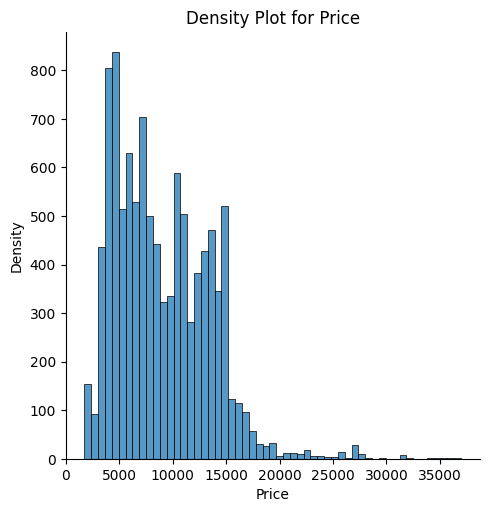

In [ ]:
sns.displot(df['Price'])

plt.title('Density Plot for Price')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

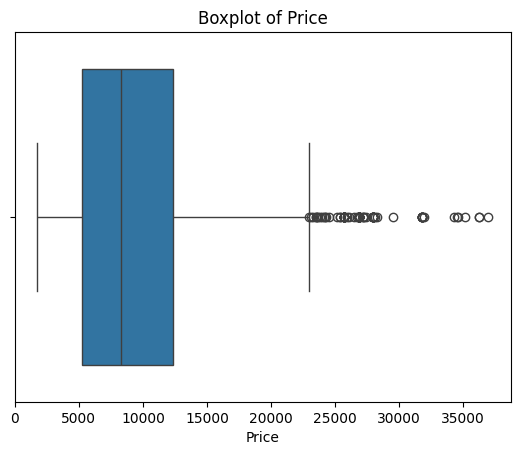

In [297]:
sns.boxplot(x=df["Price"])
plt.title("Boxplot of Price")
plt.show()

Apply Train test split

In [298]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)

Save y_train and y_test as csv

In [299]:
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

Apply target encoding for route column.

First set option to display all columns

In [ ]:
pd.set_option('display.max_columns', None)

Initialize the target encoder, fit the encoder on the training data, then transform both the training and testing data

In [ ]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['Route1', 'Route2', 'Route3', 'Route4', 'Route5'])

encoder.fit(X_train, y_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

X_test.head()


Encoded Test Data:


,Total_Stops,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New Delhi
330,1.0,6.0,3.0,13.0,0.0,6.0,3.0,18.0,50.0,5.0,50.0,10423.325173,11547.493004,10022.279684,8405.89181,8948.031595,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
7461,1.0,18.0,5.0,16.0,0.0,18.0,5.0,21.0,0.0,5.0,0.0,10423.325173,11547.493004,10022.279684,8405.89181,8948.031595,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5023,1.0,21.0,3.0,9.0,10.0,22.0,3.0,1.0,35.0,16.0,25.0,10423.325173,11547.493004,10022.279684,8405.89181,8948.031595,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4613,1.0,18.0,5.0,10.0,35.0,18.0,5.0,19.0,0.0,8.0,25.0,10423.325173,11547.493004,10022.279684,8405.89181,8948.031595,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9931,0.0,21.0,3.0,6.0,55.0,21.0,3.0,9.0,35.0,2.0,40.0,9145.941871,4587.670669,5040.789606,8405.89181,8948.031595,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [302]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2090 entries, 330 to 530
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        2090 non-null   float64
 1   dept_day                           2090 non-null   float64
 2   dept_month                         2090 non-null   float64
 3   dept_hour                          2090 non-null   float64
 4   dept_minute                        2090 non-null   float64
 5   arrival_day                        2090 non-null   float64
 6   arrival_month                      2090 non-null   float64
 7   arrival_hour                       2090 non-null   float64
 8   arrival_minute                     2090 non-null   float64
 9   duration_hours                     2090 non-null   float64
 10  duration_minutes                   2090 non-null   float64
 11  Route1                             2090 non-null   float64
 

In [303]:
X_test.to_csv('data/X_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

Next examine feature correlation

In [304]:
train_df = pd.concat([X_train, y_train], axis=1)

Use the Pearson Correlation

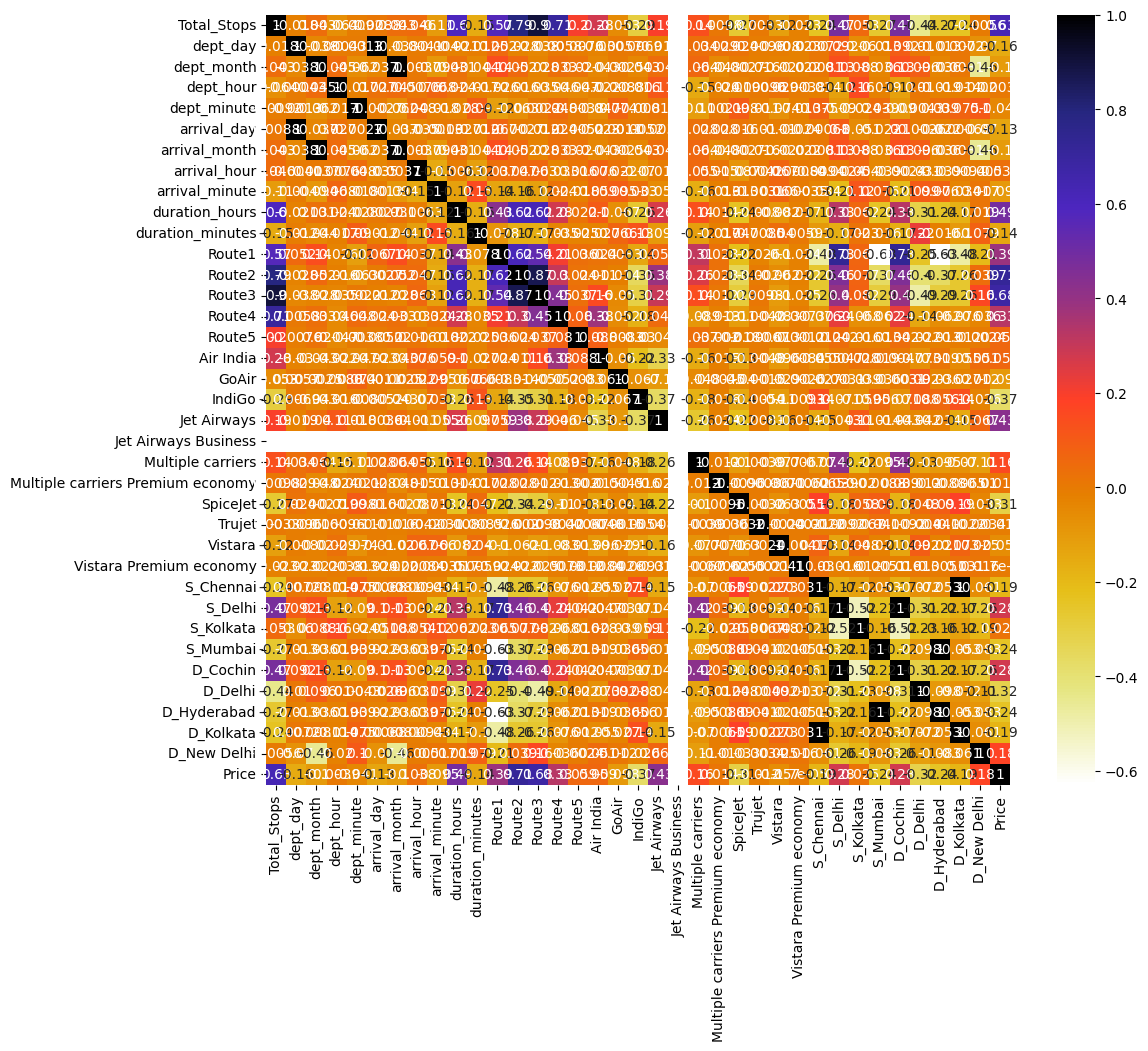

In [ ]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [306]:
train_df.corr()

,Total_Stops,dept_day,dept_month,dept_hour,dept_minute,arrival_day,arrival_month,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Cochin,D_Delhi,D_Hyderabad,D_Kolkata,D_New Delhi,Price
Total_Stops,1.000000,-0.017895,0.043210,-0.063934,-0.009153,0.008845,0.043210,0.045841,-0.106238,0.595765,-0.154748,0.568591,0.791308,0.903334,0.705470,0.202335,0.276252,-0.052961,-0.293639,0.193627,NaN,0.136487,0.009841,-0.273034,0.003279,-0.119554,-0.022941,-0.238796,0.473746,0.052702,-0.265171,0.473746,-0.444784,-0.265171,-0.238796,-0.005574,0.626139
dept_day,-0.017895,1.000000,-0.038330,-0.000426,-0.001313,0.998283,-0.038330,-0.004089,-0.004015,-0.020937,-0.011575,0.051934,-0.028027,-0.038362,0.005753,-0.007556,-0.030374,0.005698,0.006854,-0.019123,NaN,0.033930,0.029240,0.023976,-0.009618,-0.007990,-0.022622,0.007179,0.091888,-0.059739,-0.013214,0.091888,0.010021,-0.013214,0.007179,-0.070397,-0.155361
dept_month,0.043210,-0.038330,1.000000,0.045309,-0.062198,-0.037004,1.000000,0.003747,-0.093963,0.031297,-0.043877,0.144765,0.051806,-0.027693,0.033263,0.020254,-0.043360,-0.002478,-0.043081,0.040204,NaN,0.063892,-0.048126,-0.002716,-0.016034,-0.020444,-0.022340,0.008054,0.134745,0.087914,-0.035559,0.134745,0.095697,-0.035559,0.008054,-0.455829,-0.101353
dept_hour,-0.063934,-0.000426,0.045309,1.000000,-0.016671,0.027391,0.045309,0.007643,0.068152,0.024036,-0.016560,-0.026173,-0.016386,-0.035283,-0.046045,-0.047018,-0.022267,-0.008772,-0.016489,0.112841,NaN,-0.147618,-0.023860,-0.019097,0.000962,0.028932,-0.003847,-0.014229,-0.124519,0.159376,-0.018853,-0.124519,0.010239,-0.018853,-0.014229,-0.019797,0.003882
dept_minute,-0.009153,-0.001313,-0.062198,-0.016671,1.000000,-0.002709,-0.062198,0.047536,-0.017628,-0.027548,0.090148,-0.117930,-0.063356,0.002182,0.047633,-0.003774,-0.046637,0.073605,-0.008032,0.017980,NaN,-0.112575,0.002068,0.097883,-0.011276,-0.074372,-0.012811,0.074665,-0.089844,-0.023890,0.039324,-0.089844,0.004312,0.039324,0.074665,0.104245,-0.040733
arrival_day,0.008845,0.998283,-0.037004,0.027391,-0.002709,1.000000,-0.037004,-0.034949,-0.001348,0.002711,-0.012496,0.067339,-0.002749,-0.012251,0.024267,-0.005166,-0.022550,0.001071,-0.005198,-0.003646,NaN,0.027794,0.028095,0.015683,-0.010129,-0.010252,-0.023505,-0.000682,0.099881,-0.051316,-0.022225,0.099881,-0.002592,-0.022225,-0.000682,-0.069954,-0.134442
arrival_month,0.043210,-0.038330,1.000000,0.045309,-0.062198,-0.037004,1.000000,0.003747,-0.093963,0.031297,-0.043877,0.144765,0.051806,-0.027693,0.033263,0.020254,-0.043360,-0.002478,-0.043081,0.040204,NaN,0.063892,-0.048126,-0.002716,-0.016034,-0.020444,-0.022340,0.008054,0.134745,0.087914,-0.035559,0.134745,0.095697,-0.035559,0.008054,-0.455829,-0.101353
arrival_hour,0.045841,-0.004089,0.003747,0.007643,0.047536,-0.034949,0.003747,1.000000,-0.146207,-0.006295,-0.116316,0.036836,0.046670,0.062548,-0.032907,0.015747,0.075608,0.022180,-0.069924,-0.010510,NaN,0.055155,0.014762,-0.086609,0.004209,0.066647,0.000840,-0.009426,-0.002416,0.054423,-0.039484,-0.002416,-0.030981,-0.039484,-0.009426,-0.005005,0.038112
arrival_minute,-0.106238,-0.004015,-0.093963,0.068152,-0.017628,-0.001348,-0.093963,-0.146207,1.000000,-0.123612,0.152732,-0.135903,-0.156657,-0.124713,0.024352,-0.018150,0.059133,0.095474,0.032930,-0.055099,NaN,-0.161919,-0.012606,0.013024,-0.003100,0.065977,0.000349,-0.034021,-0.205724,0.116237,0.076197,-0.205724,0.099113,0.076197,-0.034021,0.017439,-0.095127
duration_hours,0.595765,-0.020937,0.031297,0.024036,-0.027548,0.002711,0.031297,-0.006295,-0.123612,1.000000,-0.160406,0.430628,0.618998,0.623691,0.275581,0.022254,0.100571,-0.067295,-0.263585,0.263681,NaN,0.135050,0.013894,-0.236894,-0.007977,-0.082169,-0.016796,-0.174838,0.328464,0.062057,-0.241982,0.328464,-0.312935,-0.241982,-0.1

Define a function to Check correlated features with 0.8 thershold

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [308]:
corr_features = correlation(train_df, 0.8)
len(set(corr_features))

6

In [309]:
corr_features

{'D_Cochin',
 'D_Hyderabad',
 'D_Kolkata',
 'Route3',
 'arrival_day',
 'arrival_month'}

Examine which of the correlated features is most correlated with Price

In [ ]:
corr_df = train_df[list(corr_features) + ['Price']]

correlations_with_dependent = corr_df.corr()['Price']

corr_w_dependent = correlations_with_dependent.drop('Price').abs().sort_values(ascending=False).reset_index()
corr_w_dependent

,index,Price
0,Route3,0.677209
1,D_Cochin,0.280481
2,D_Hyderabad,0.242720
3,D_Kolkata,0.185812
4,arrival_day,0.134442
5,arrival_month,0.101353


Drop the correlated features except the one most correlated with Price

In [311]:
col_to_drop = corr_w_dependent['index'][1:]
X_train.drop(col_to_drop, axis=1, inplace=True)

Next observe Mutual information gain, examine the mutual information between each feature and Price

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info 

array([0.7446585 , 0.33550141, 0.59761029, 0.86953924, 0.70523024,
       1.08744265, 0.87165816, 0.8946745 , 0.63569166, 1.04321754,
       1.6951034 , 1.18260009, 0.30033358, 0.0096146 , 0.29102239,
       0.03126117, 0.35171829, 0.53084763, 0.        , 0.25537896,
       0.00346943, 0.20066159, 0.        , 0.12829993, 0.00239203,
       0.1315616 , 0.50484876, 0.43318209, 0.19600764, 0.32249894,
       0.17514792])

Sort by greatest to least

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

mutual_info.sort_values(ascending=False)

Route2                               1.695103
Route3                               1.182600
arrival_hour                         1.087443
Route1                               1.043218
duration_hours                       0.894674
arrival_minute                       0.871658
dept_hour                            0.869539
Total_Stops                          0.744658
dept_minute                          0.705230
duration_minutes                     0.635692
dept_month                           0.597610
Jet Airways                          0.530848
S_Delhi                              0.504849
S_Kolkata                            0.433182
IndiGo                               0.351718
dept_day                             0.335501
D_Delhi                              0.322499
Route4                               0.300334
Air India                            0.291022
Multiple carriers                    0.255379
SpiceJet                             0.200662
S_Mumbai                          

Drop all columns with mutual info of less than 0.01

In [ ]:
low_mi_columns = mutual_info[mutual_info < 0.01].index.tolist()

print(low_mi_columns)

['Route5', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet', 'Vistara Premium economy']


In [315]:
X_train = X_train.drop(low_mi_columns, axis=1)

Drop the columns from X_test also that were dropped from X_train

In [316]:
columns_to_drop_from_X_test = X_test.columns.difference(X_train.columns)

X_test.drop(columns=columns_to_drop_from_X_test,axis=1, inplace=True)

In [317]:
X_train.columns

Index(['Total_Stops', 'dept_day', 'dept_month', 'dept_hour', 'dept_minute',
       'arrival_hour', 'arrival_minute', 'duration_hours', 'duration_minutes',
       'Route1', 'Route2', 'Route3', 'Route4', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Multiple carriers', 'SpiceJet', 'Vistara', 'S_Chennai',
       'S_Delhi', 'S_Kolkata', 'S_Mumbai', 'D_Delhi', 'D_New Delhi'],
      dtype='object')

In [318]:
X_train.shape

(8360, 26)

In [319]:
X_test.shape

(2090, 26)

Output the X_train and X_test before scaling

In [320]:
X_train.to_csv('data/X_train.csv', index=False)

In [321]:
X_test.to_csv('data/X_test.csv', index=False)

Plot histograms for each column to determine distribution

In [322]:
train_df = pd.concat([X_train, y_train], axis=1)

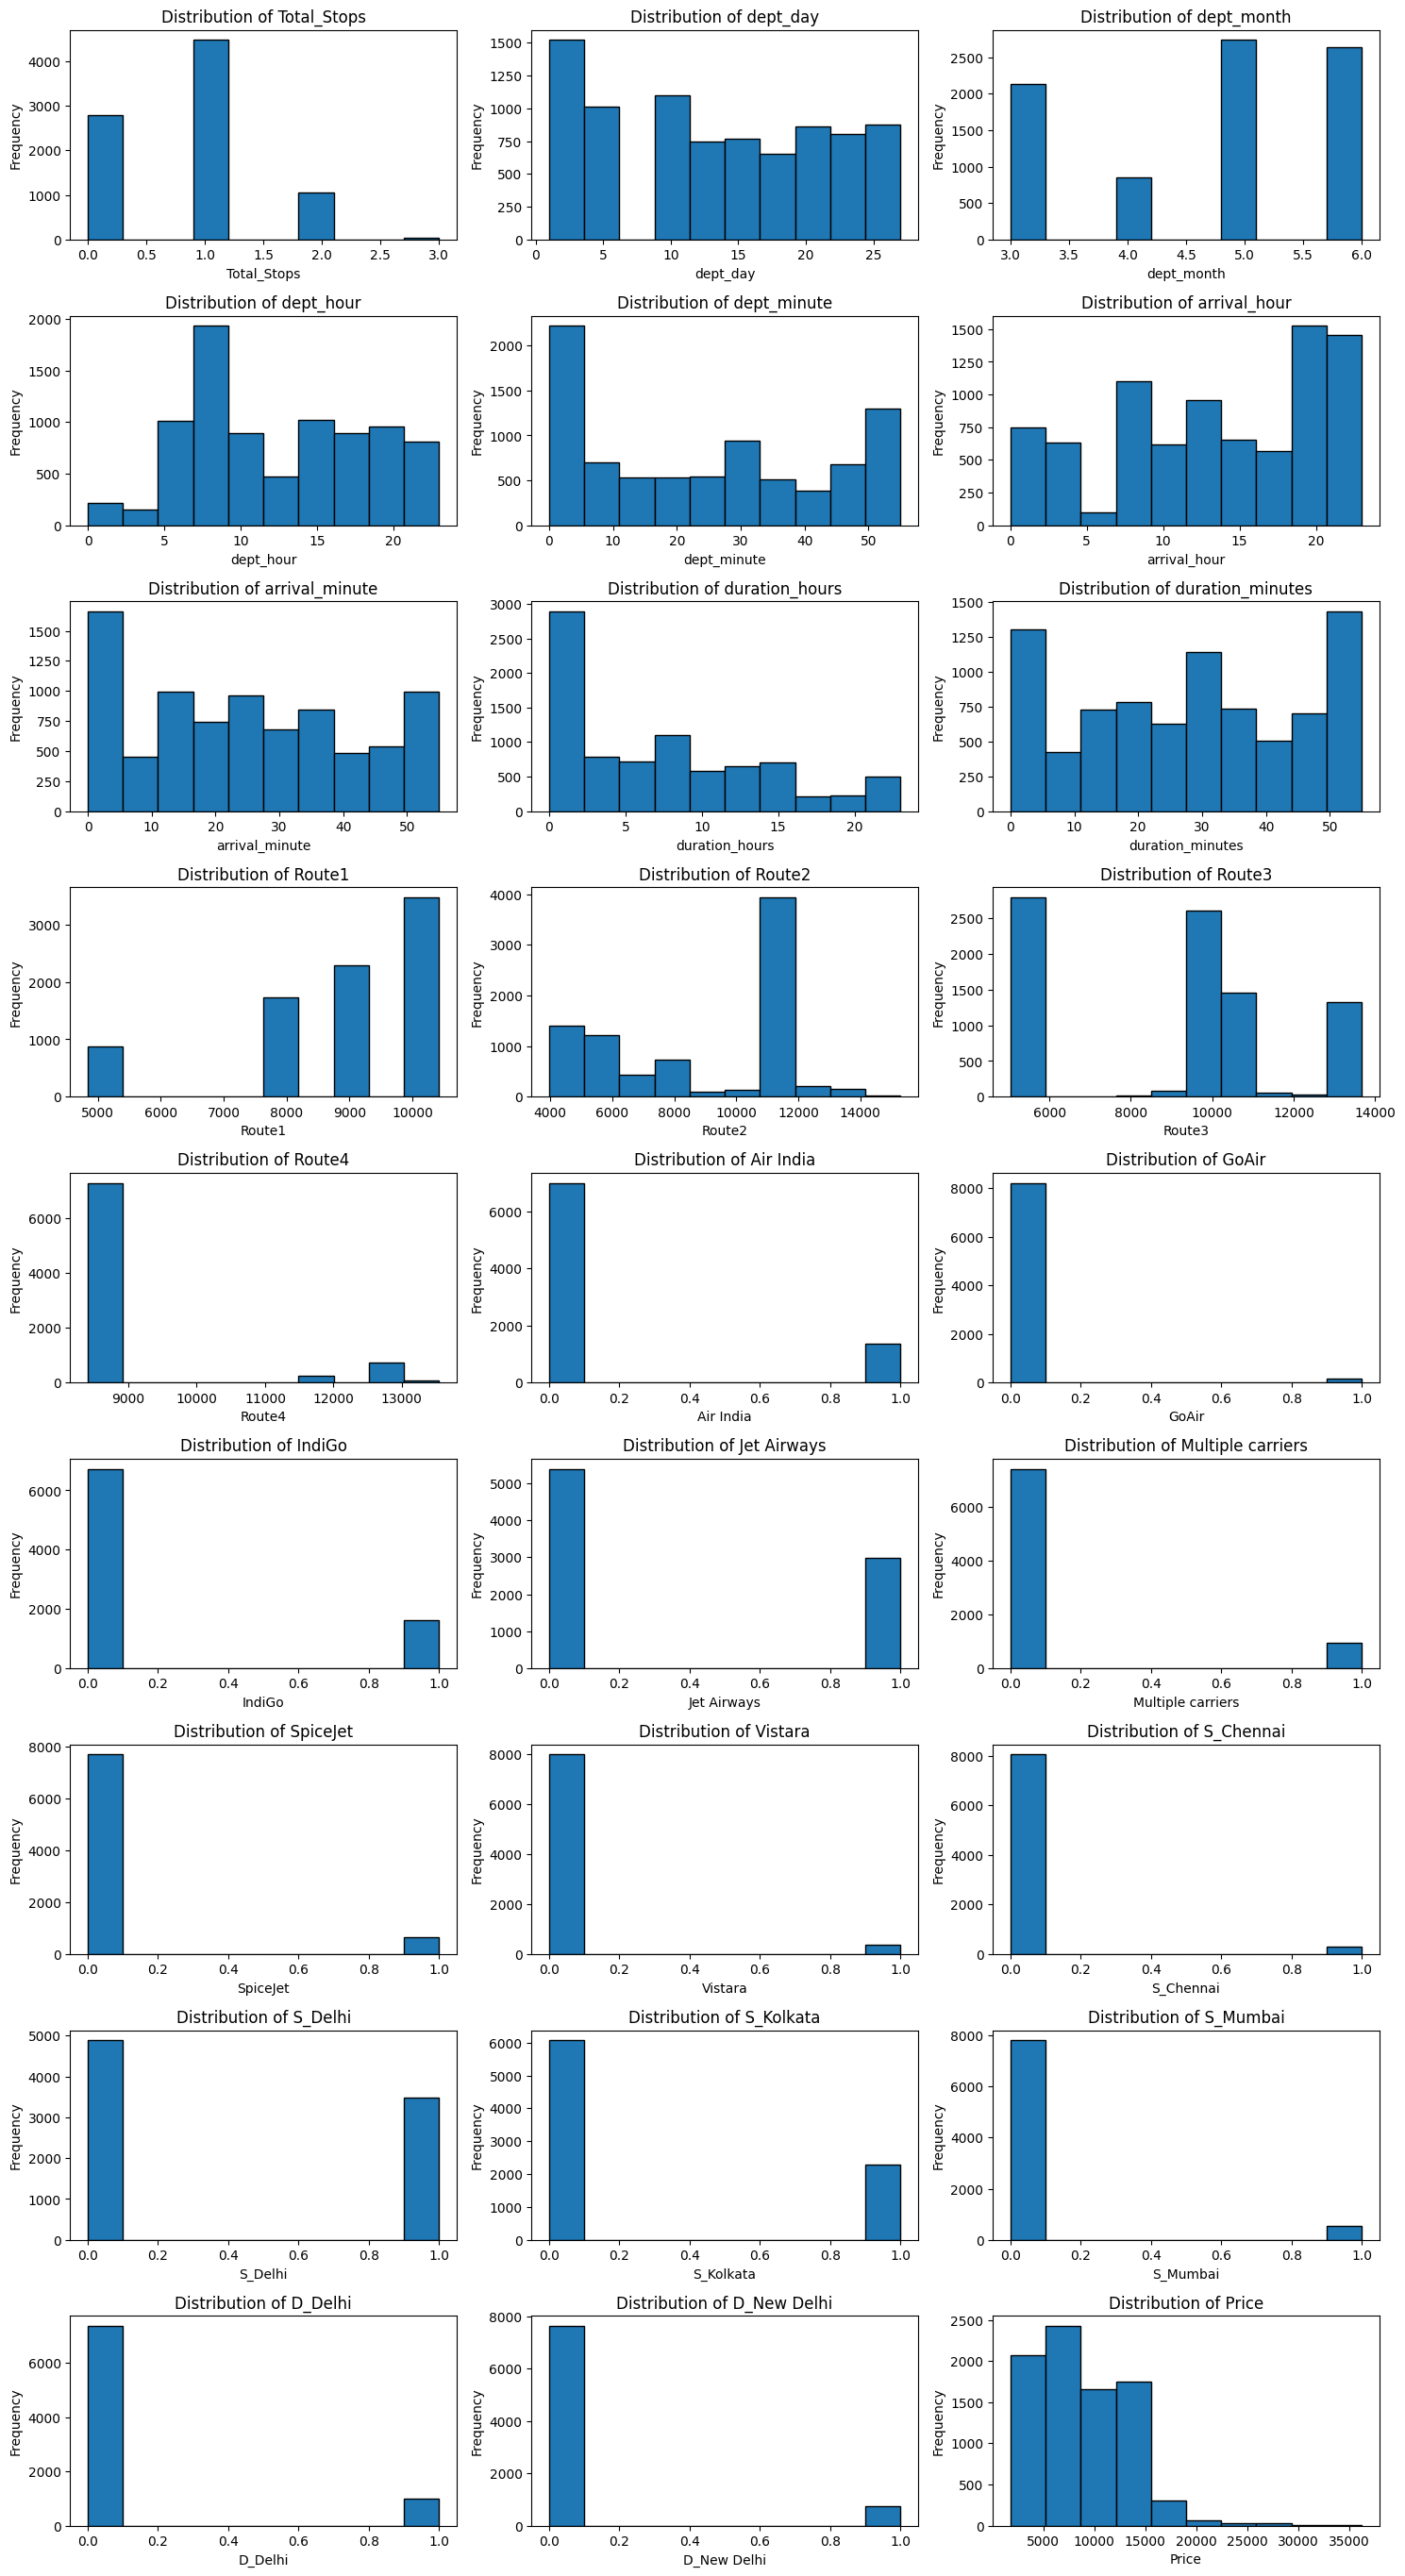

In [ ]:
columns_df = train_df.columns

num_cols = len(columns_df)
n_cols = 3
n_rows = 10

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(columns_df):
    axes[i].hist(train_df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for idx in range(num_cols, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

Most of the columns have a clear min and max bounds so scale features using Min Max scaling. Can scale the Price feature with log scaling. 

Scaling the price feature with log

In [324]:
train_df['rescaled_price'] = np.log1p(train_df['Price'])

In [325]:
scaled_y_train = np.log1p(y_train)

Need to also scale the Test dataset

In [326]:
scaled_y_test = np.log1p(y_test)

Output y_train and y_test as csv

In [327]:
scaled_y_train.to_csv('data/scaled_y_train.csv', index=False)

In [328]:
scaled_y_test.to_csv('data/scaled_y_test.csv', index=False)

Observe distribution of rescaled price feature

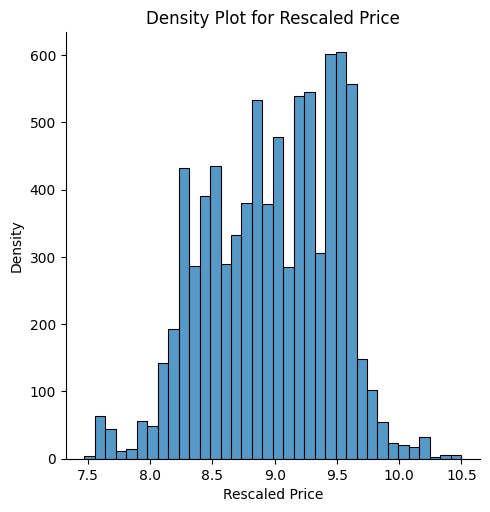

In [ ]:
sns.displot(train_df['rescaled_price'])

plt.title('Density Plot for Rescaled Price')
plt.xlabel('Rescaled Price')
plt.ylabel('Density')

plt.show()

Scale the dependent features Min Max for both Train and Test

In [330]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_train

scaled_X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
scaled_X_test


,Total_Stops,dept_day,dept_month,dept_hour,dept_minute,arrival_hour,arrival_minute,duration_hours,duration_minutes,Route1,Route2,Route3,Route4,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,S_Chennai,S_Delhi,S_Kolkata,S_Mumbai,D_Delhi,D_New Delhi
0,0.333333,0.192308,0.000000,0.565217,0.000000,0.782609,0.909091,0.217391,0.909091,1.000000,0.669684,0.577278,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.333333,0.653846,0.666667,0.695652,0.000000,0.913043,0.000000,0.217391,0.000000,1.000000,0.669684,0.577278,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.333333,0.769231,0.000000,0.391304,0.181818,0.043478,0.636364,0.695652,0.454545,1.000000,0.669684,0.577278,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.333333,0.653846,0.666667,0.434783,0.636364,0.826087,0.000000,0.347826,0.454545,1.000000,0.669684,0.577278,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.769231,0.000000,0.260870,1.000000,0.391304,0.636364,0.086957,0.727273,0.771177,0.055542,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,0.333333,0.192308,1.000000,0.347826,0.454545,0.826087,0.909091,0.478261,0.454545,0.771177,0.669684,0.629935,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2086,0.666667,0.192308,1.000000,0.869565,0.000000,0.173913,0.454545,0.347826,0.454545,1.000000,0.860171,0.910271,0.834539,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2087,0.000000,0.653846,0.000000,0.826087,0.636364,0.956522,0.090909,0.086957,0.545455,0.771177,0.055542,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2088,0.333333,0.307692,1.000000,0.869565,0.363636,0.434783,0.818182,0.608696,0.454545,0.771177,0.637771,0.629935,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Output data

In [331]:
scaled_X_train.to_csv('data/scaled_X_train.csv', index=False)

In [332]:
scaled_X_test.to_csv('data/scaled_X_test.csv', index=False)